# Model `BinaryMFThreshold`

With initial factorization `U` and `V` provided by `NMFSklearn`.

In [57]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of models.BinaryMFThresholdExColumnwise failed: Traceback (most recent call last):
  File "c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\extensions\autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\extensions\autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\extensions\autoreload.py", line 393, in update_generic
    update(a, b)
  File "c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\extensions\autoreload.py", line 345, in update_class
    if update_generic(old_obj, new_obj):
  File "c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\extensions\autoreload.py", line 393, in update_generic
    update(a, b)
  File "c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\extensions\autoreload.py", line 305, in update_function
    s

In [58]:
# from generators import BlockDiagonalMatrixGenerator

# n_row, n_col, k, seed = 300, 500, 5, None

# data = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.2, 0.1, 0.2, 0.1])
# data.generate(seed=seed) # if no seed assigned, use time instead

# data.show_matrix(title="gen_diag_sorted")

In [59]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

# idx = data.sample(factor_id=0, n_samples=300)
# idx = data.sample(factor_id=1, n_samples=500)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [60]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 7527
[I]   val_size     : 1076
[I]   test_size    : 2151
[I]   seed         : 2023


In [61]:
# shared params
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 50

# 1. Init with `NMFSklearn`

The thresholding gap can be relatively wide if you init with `BinaryMFPenalty` (`NMFSklearn` followed by `BinaryMFPenalty`), as the factors are already (near) binary.

[I] k            : 50
[I] U            : None
[I] V            : None
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] init_method  : nndsvda
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] beta_loss    : frobenius
[I] solver       : mu
[I] Missing validation data.
[W] Missing testing data.


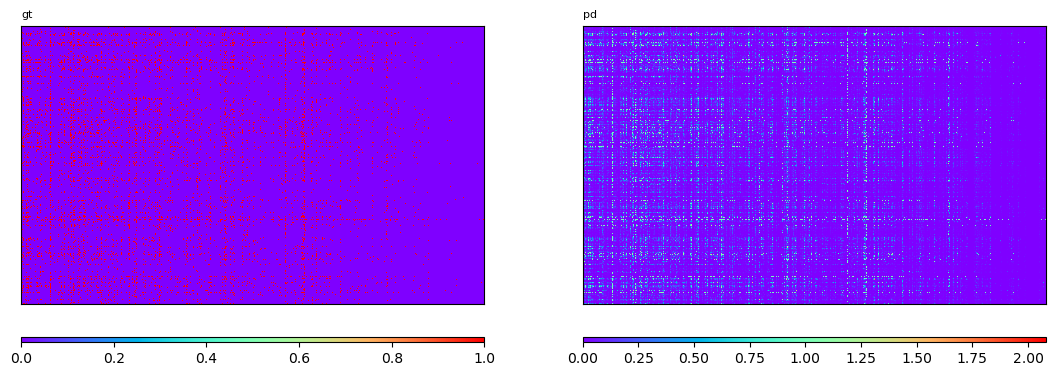

In [62]:
from models import NMFSklearn

model_nmf = NMFSklearn(k=k, solver='mu', init_method='nndsvda', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U, model_nmf.V

# 2. Init with `NMF` + `BinaryMFPenalty`

In [63]:
# reg = 1
# reg_growth = 3

# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# 3. `BinaryMFThresholdExColumnwise`

[I] k            : 50
[I] U            : (300, 50)
[I] V            : (500, 50)
[I] W            : full
[I] min_diff     : 1e-06
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1714673437
[I] verbose      : False
[I] display      : False
[I] u            : 0.1
[I] v            : 0.1
[I] lamda        : 10
[I] task         : reconstruction
[I] verbose      : True
[I] Normalized U: [0.0, 2.750947900815273] -> [0.0, 1.0], V: [0.0, 10.952701432636001] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [28811750.459, 26530202.593]
[I] [I] Wolfe line search for iter   : 1
[I]     num of function evals made   : 30
[I]     num of gradient evals made   : 3
[I]     function value update        : 2501280.781 -> 1881.152
[I]     threshold update             : [0.100, 0.100] -> [0.529, 0.495]
[I]     threshold update direction   : [0.429, 0.395]
[I]     threshold difference         : 0.583618
[I] iter: 2, start: [0.529, 0.495], direction: [-1040.175, -815.789]
[I] [I] W

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   03/05/24 02:10:37    0  0.100000  0.100000  2.501281e+06  0.911386   
1   03/05/24 02:10:37    1  0.529329  0.495331  1.881152e+03  0.403879   
2   03/05/24 02:10:38    2  0.497585  0.470435  1.863171e+03  0.428856   
3   03/05/24 02:10:38    3  0.505667  0.477432  1.859553e+03  0.425136   
4   03/05/24 02:10:38    4  0.503475  0.479983  1.859532e+03  0.425003   
5   03/05/24 02:10:39    5  0.504427  0.479606  1.859528e+03  0.424339   
6   03/05/24 02:10:39    6  0.503945  0.479102  1.859526e+03  0.425800   
7   03/05/24 02:10:39    7  0.504427  0.479391  1.859525e+03  0.424339   
8   03/05/24 02:10:39    8  0.504093  0.479082  1.859524e+03  0.425136   
9   03/05/24 02:10:40    9  0.504246  0.479184  1.859523e+03  0.425136   
10  03/05/24 02:10:40   10  0.504285  0.479189  1.859523e+03  0.425136   
11  03/05/24 02:10:40   11  0.504271  0.479162  1.859523e+03  0.425136   
12  03/05/24 02:10:40   12  0.504293  0.479170  1.859523e+03  0.425136   
13  03/05/24 02:10:41   13  0.504282  0.479155  1.859523e+03  0.425136   
14  03/05/24 02:10:41   14  0.504295  0.479161  1.859523e+03  0.425136   
15  03/05/24 02:10:41   15  0.504287  0.479153  1.859523e+03  0.425136   
16  03/05/24 02:10:41   16  0.504296  0.479158  1.859523e+03  0.425136   
17  03/05/24 02:10:42   17  0.504290  0.479152  1.859523e+03  0.425136   
18  03/05/24 02:10:42   18  0.504292  0.479154  1.859523e+03  0.425136   
19  03/05/24 02:10:42   19  0.504293  0.479154  1.859523e+03  0.425136   

                                       val                                \
                                         0                                 
   Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0   0.283811  0.880147  0.432835  0.489777  0.021803  0.838713  0.041748   
1   0.947040  0.968953  0.566266  0.020446  0.006854  0.971720  0.010266   
2   0.919396  0.969453  0.584889  0.028810  0.008829  0.969833  0.013516   
3   0.921394  0.969333  0.581818  0.026952  0.008350  0.970060  0.012750   
4   0.920311  0.969300  0.581478  0.027881  0.008631  0.970053  0.013181   
5   0.920992  0.969287  0.580991  0.027881  0.008651  0.970107  0.013204   
6   0.920448  0.969340  0.582251  0.027881  0.008616  0.970013  0.013164   
7   0.920992  0.969287  0.580991  0.027881  0.008651  0.970107  0.013204   
8   0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
9   0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
10  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
11  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
12  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
13  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
14  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
15  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
16  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
17  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
18  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   
19  0.921128  0.969327  0.581765  0.027881  0.008636  0.970067  0.013187   

        test                                
           0                                
      Recall Precision  Accuracy        F1  
0   0.475128  0.042282  0.838147  0.077654  
1   0.018596  0.012461  0.964793  0.014923  
2   0.025105  0.015380  0.962973  0.019075  
3   0.024640  0.015261  0.963213  0.018848  
4   0.024640  0.015247  0.963193  0.018838  
5   0.024640  0.015283  0.963247  0.018865  
6   0.024640  0.015221  0.963153  0.018818  
7   0.024640  0.015283  0.963247  0.018865  
8   0.024640  0.015256  0.963207  0.018844  
9   0.024640  0.015256  0.963207  0.018844  
10  0.024640  0.015256  0.96

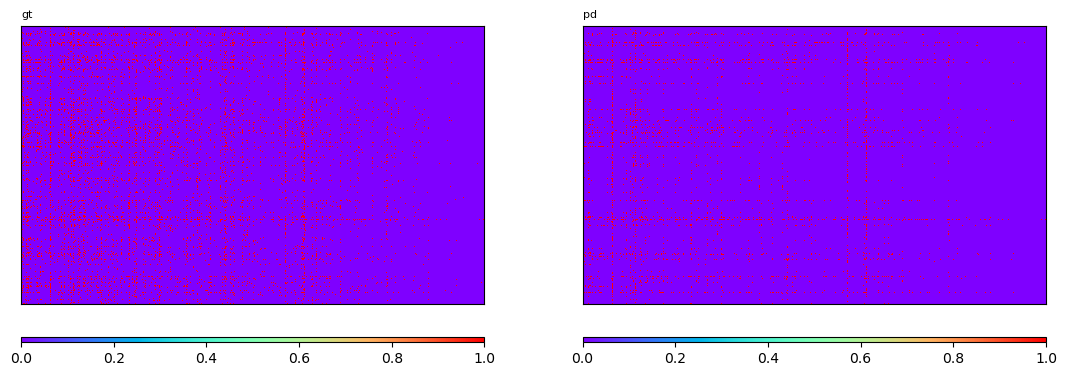

In [64]:
from models import BinaryMFThreshold

u, v = 0.1, 0.1
# u, v = 0.5, 0.5
W = 'full'

task = 'reconstruction'
init_method = 'custom'
lamda = 10

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, lamda=lamda, init_method=init_method)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=True, display=False)

In [65]:
t = [0.46, 0.55, 0.48, 0.07, 0.71, 0.62, 0.62, 0.33, 0.49, 0.33, 0.12, 0.59, 0.28, 0.57, 0.32, 0.46, 0.34, 0.27, 0.24, 0.48, 0.31, 0.54, 0.28, 0.40, 0.76, 0.46, 0.26, 0.61, 0.28, 0.30, 0.28, 0.20, 0.47, 0.38, 0.23, 0.28, 0.16, 0.19, 0.19, 0.45, 0.82, 0.21, 0.25, 0.19, 0.56, 0.22, 0.27, 0.28, 0.32, 0.66, 1.12, 0.53, 0.47, 0.10, 0.45, 0.50, 0.62, 0.36, 0.36, 0.48, 0.21, 0.11, 0.12, 0.23, 0.15, 0.17, 0.42, 0.42, 0.34, 0.24, 0.62, 0.52, 0.45, 0.14, 0.31, 0.40, 0.41, 0.16, 0.18, 0.33, 0.66, 0.32, 0.23, 0.16, 0.13, 0.46, 0.65, 0.12, 0.90, 0.45, 0.17, 0.15, 0.39, 0.48, 0.15, 0.75, 0.16, 0.38, 1.12, 0.47]

In [66]:
t[48]

0.32

In [67]:
t[48+50]

1.12

# a. Visualize F

In [68]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 50
# dpi = 100

In [69]:
# x = np.linspace(0, 1.2, N)
# y = np.linspace(0, 1.2, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         Z[i, j] = model.F([X[i, j], Y[i, j]])
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=50, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# b. Visualize dF

In [70]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()